<a href="https://colab.research.google.com/github/KESHAVGUPTA2003/Sparks-Foundation-Task-3-Retail/blob/main/_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation**

### **Keshav Gupta**
### **Exploratory** **Data** **Analysis** - **Retail**

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Sample Superstore.csv to Sample Superstore.csv


In [2]:
#import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#loading data set
Data=pd.read_csv('Sample Superstore.csv')
#loading first 5 rows 
Data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
#checking null values in data set
Data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#checking Duplicate Values in data set
Data.duplicated().sum()

17

In [8]:
#removing 17 Duplicate rows
Data.drop_duplicates()
Data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


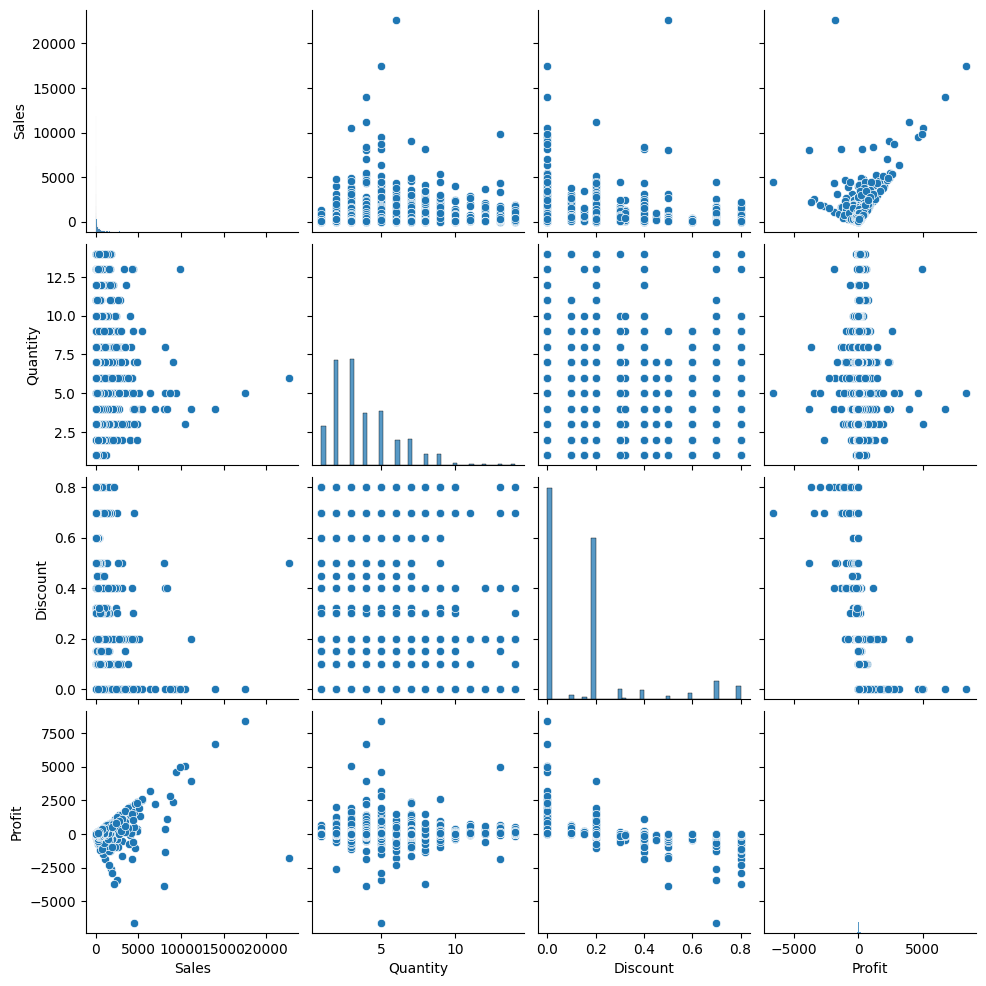

In [12]:
#Data Visualization
sns.pairplot(Data)


<ipython-input-13-a4094b8ead50>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr())


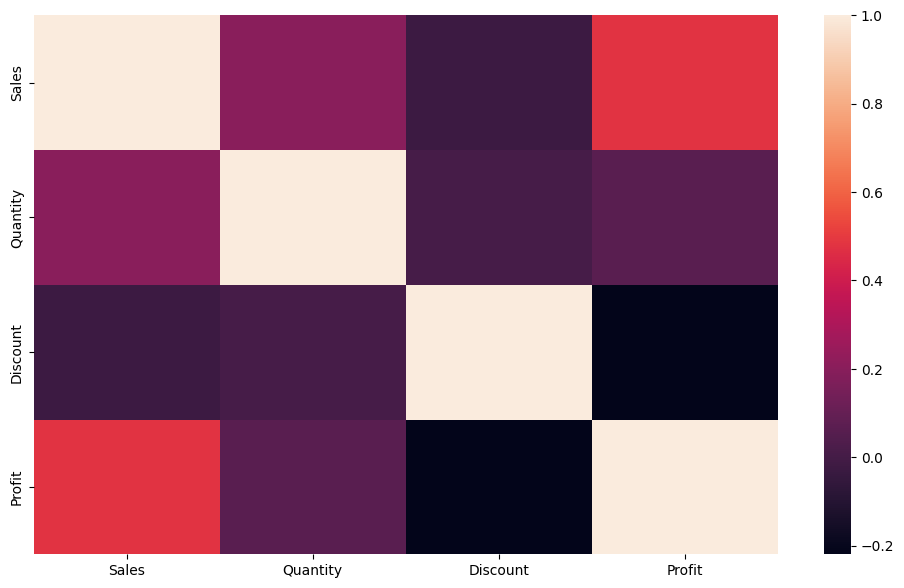

In [13]:
fig,axes = plt.subplots(1,1,figsize=(12,7))
sns.heatmap(Data.corr())
plt.show()

In [15]:
Data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

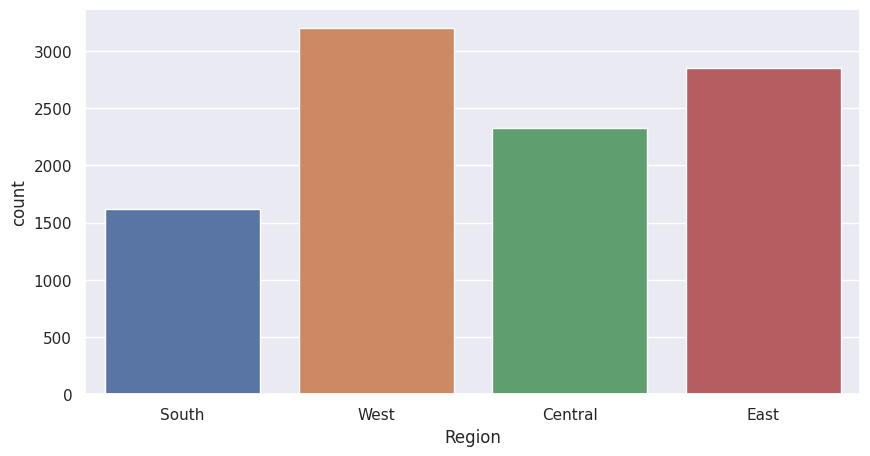

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=Data['Region'])

In [17]:
Data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<Axes: xlabel='Segment', ylabel='count'>

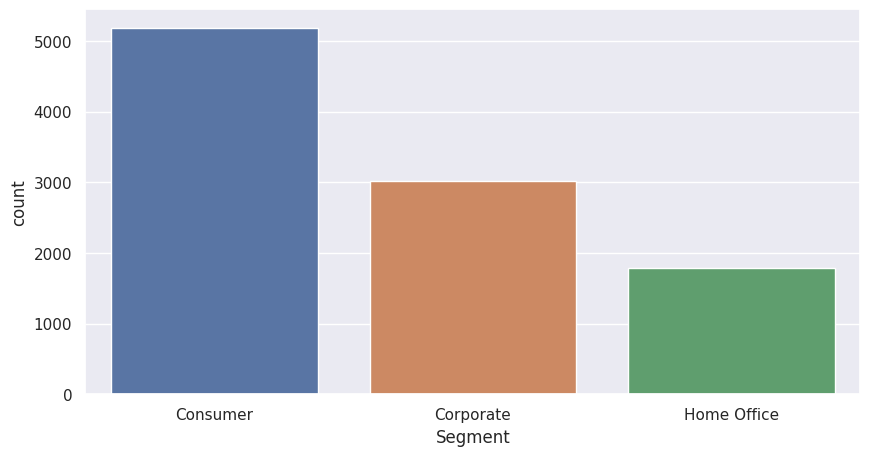

In [18]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x=Data['Segment'])

<ipython-input-19-1b1ae4317144>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()


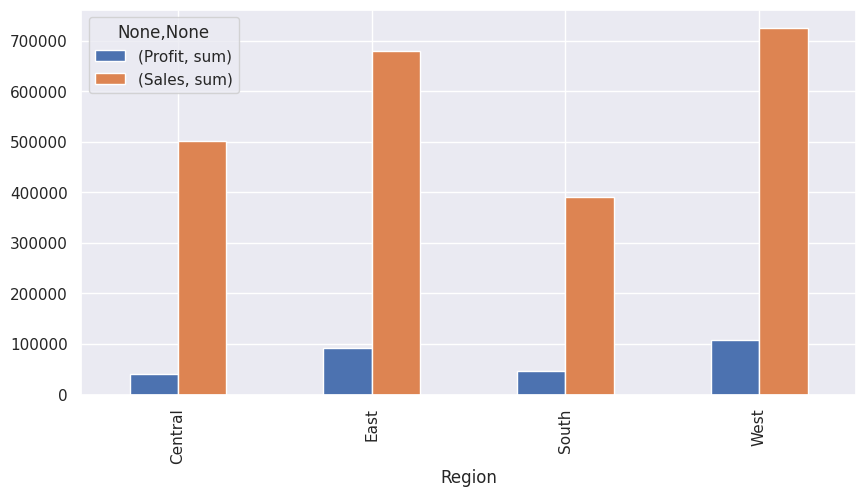

In [19]:
Data.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.rcParams['figure.figsize']=[5,15]
plt.show()

In [21]:
Data_shipmode=Data[['Ship Mode','Category','Quantity']].groupby(['Ship Mode','Category']).sum('Quantity')
Data_shipmode

Quantity
Ship Mode      Category                 
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122

<Axes: xlabel='Ship Mode,Category'>

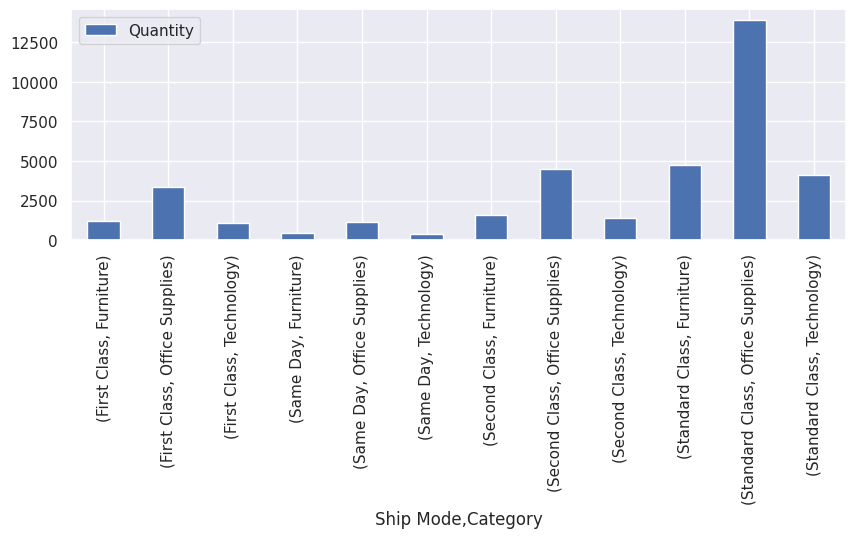

In [22]:
Data_shipmode.plot(kind='bar',figsize=(10,3))

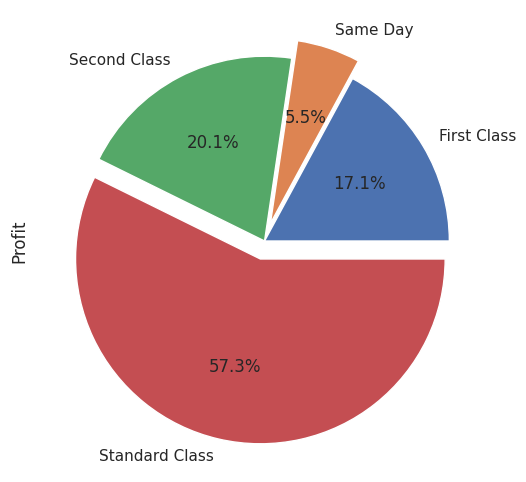

In [23]:
plt.figure(figsize=(10,6))
Data.groupby('Ship Mode').Profit.sum().plot.pie(autopct='%1.1f%%',explode=(0,0.1,0,0.1),shadow=False)
plt.show()

<ipython-input-24-8ea913425b0c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data.groupby('State')['Profit','Sales'].sum().plot.bar(figsize=(15,5))


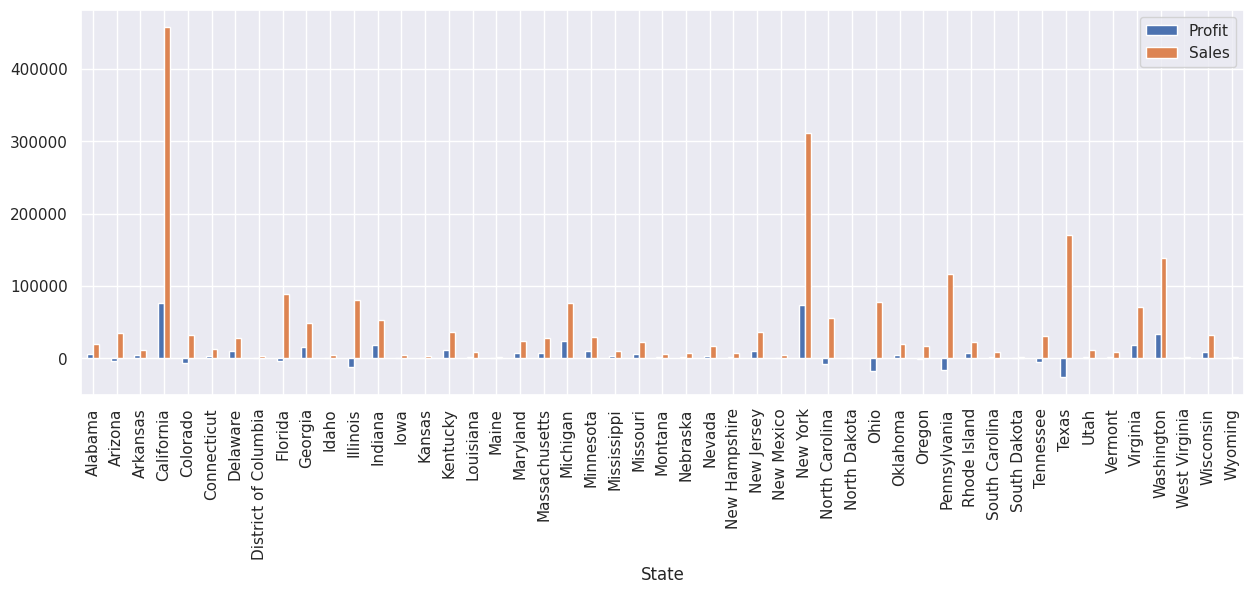

In [24]:
Data.groupby('State')['Profit','Sales'].sum().plot.bar(figsize=(15,5))
plt.show()

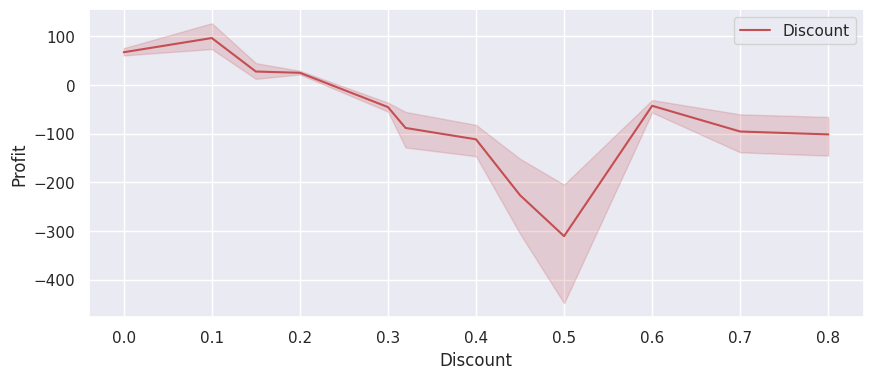

In [25]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Discount',y='Profit',data=Data,color='r',label='Discount')
plt.legend()

In [26]:
Data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

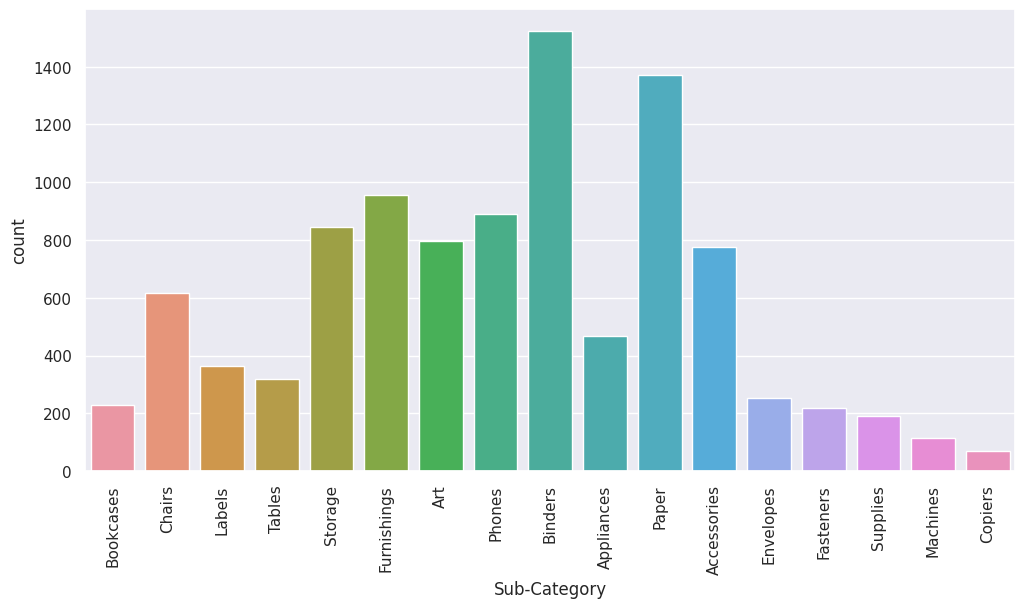

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x=Data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

<ipython-input-28-0100b84d197b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


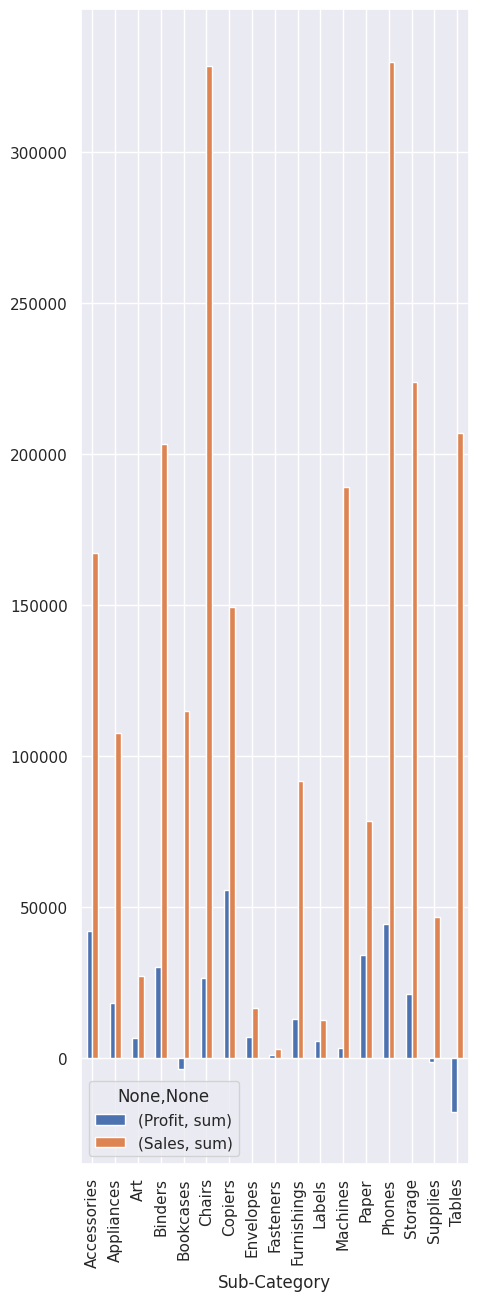

In [28]:
Data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.rcParams['figure.figsize']=[1,10]
plt.show()